# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή υλοποιήθηκαν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αναγνώριση ψηφίων από εικόνα στο dataset MNIST. Συγκεκριμένα, δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα pixels της κάθε εικόνας και $y_i$ είναι η ετικέτα της εικόνας - ένας ακέραιος στο $[0,9]$. Σε κάθε περίπτωση κληθήκαμε να σχεδιάσουμε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,9]}$$
</br>

<img src="https://fiori-implementation.com/blog/wp-content/uploads/2017/08/nobackground-machine-learning-netlife-robot-study-book-reading-flat-art-cover-1-730x300.png" alt="machine learning">

# Εκφώνηση

## 1ο Μέρος: Αξιολόγηση




Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα υλοποιηθούν στα επόμενα μέρη.

## 2ο Μέρος: ΚΝΝ

Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται μια "φρέσκια" εικόνα ως διάνυσμα από pixels $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστιχεί στα pixels μιας εικόνας από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στις 100 πρώτες εικόνες του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 1ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

## 3ο Μέρος: Naive Bayes

Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean, δηλαδή παίρνουν δύο τιμές
  - Για το συγκεκριμένο πρόβλημα μπορούμε να στρογγυλοποιήσουμε τις τιμές των pixels από το $[0.0,1.0]\rightarrow{\{0,1\}}$
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

## 4ο Μέρος: Perceptron



Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τις εικόνες του mnist σε μια από τις 10 διαφορετικές κλάσεις (από 0 μέχρι 9). Αρχικά θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου.  

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x)είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδος του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε σε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

---
# Λύση
### Ονοματεπώνυμο: Εμμανουήλ Βεκράκης
### ΑΜ: 03116068
---

## 1ο Μέρος: Αξιολόγηση

Παρακάτω μας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές στη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong) και υπολογίζει και τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό κληθήκαμε να υλοποιήσουμε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένα}$$



In [38]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self,y_true,y_pred,x):
      self.y_true = y_true
      self.y_pred = y_pred
      self.x = x

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Our code below

      tp = 0  # number of True Positives

      for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
          tp += 1

      acc = tp / len(y_true) # accuracy = True Positives / Total Data

      ## Our code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision" : precision, "recall": recall, "f1": f1,"accuracy":self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_sample_of_wrong(self, rows = 5, lines = 4):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        plt.figure(figsize=(10, 10))

        random.shuffle(wrong_indexes)
        for i, index in enumerate(wrong_indexes[: rows*lines]):
            plt.subplot(rows, lines, i + 1)
            image = self.x[index]
            plt.imshow(image.reshape((28, 28)))
            plt.title("Real: {}, Pred: {}".format(self.y_true[index], self.y_pred[index]))
            plt.axis('off')

    def get_evaluation_report(self):
       metrics = self.get_metrics()
       for m in metrics:
         print(m+' : '+str(metrics[m]))
       cm = self.confusion_matrix()
       print("Confusion matrix: ")
       print(cm)
       print("Some images with wrong predictions")
       self.get_sample_of_wrong()

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν οι εικόνες από το dataset

precision : 0.7000000000000001
recall : 0.6944444444444443
f1 : 0.6888888888888888
accuracy : 0.625
Confusion matrix: 
[[3 1 0]
 [2 1 0]
 [0 0 1]]
Some images with wrong predictions


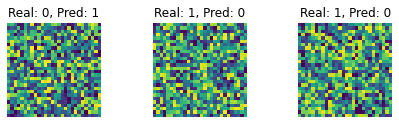

In [39]:
y_true = [1,0,2,0,0,1,1,0]
y_pred = [0,0,2,0,1,1,0,0]
x = np.random.rand(8,28*28)

eval = Evaluate(y_true,y_pred,x)
eval.get_evaluation_report()

## Dataset

To MNIST είναι από τα πιο διαδεδομένα σύνολα δεδομένων στη μηχανική μάθηση.

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_dset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
test_dset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
## From https://colab.research.google.com/notebooks/mlcc/multi-class_classification_of_handwritten_digits.ipynb#scrollTo=JfFWWvMWDFrR
def parse_labels_and_features(dataset):
  """Extracts labels and features.
  
  This is a good place to scale or transform the features if needed.
  
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the first column and
      monochrome pixel values on the remaining columns, in row major order.
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  labels = dataset[0]

  # DataFrame.loc index ranges are inclusive at both ends.
  features = dataset.loc[:,1:784]
  # Scale the data to [0, 1] by dividing out the max value, 255.
  features = features / 255

  return labels, np.array(features)

def show_image(features):
  img = features.reshape((28,28))
  plt.imshow(img)
  plt.show()

y_train,x_train = parse_labels_and_features(train_dset)
y_test,x_test = parse_labels_and_features(test_dset)

Ποια είναι η μορφή των δεδομένων για μια εικόνα;

In [41]:
print("Shape of an image: "+str(x_train[0].shape))
print("Max value of pixel: "+str(np.max(x_train[0])))

Shape of an image: (784,)
Max value of pixel: 1.0


Φορτώνουμε μια τυχαία εικόνα και την εμφανίζουμε, μαζί με την ετικέτα της

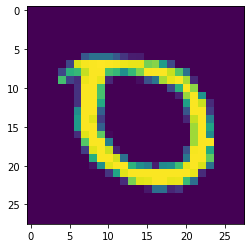

Label = 0


In [42]:
i = np.random.randint(0,x_train.shape[0])
show_image(x_train[i])
print("Label = " +str(y_train[i]))

## 2o Μέρος: Υλοποίηση KNN

 Μας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Κληθήκαμε να συμπληρώσουμε τον κώδικα που λείπει στις μεθόδους distance, get_knn και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
## Simple KNN

class KNN:
  def __init__(self,x,y,k,distance="euclidian"):
    self.x = x
    self.y = y
    self.k = k
    self.distance = distance
  
  
  ## Compute the distance between the two vectors img1 and img2
  # hint: use np.linalg.norm for eucledian
  # hint: use equation given above for cosine
  def get_distance(self,img1,img2):
    if self.distance=='euclidian':
      ##################
      ## Our code below
      
      dist = np.linalg.norm(img1 - img2)
      
      ## Our code above
      ##################
    elif self.distance=='cosine':
      ##################
      ## Our code below
      
      dist = np.dot(img1, img2) / (np.linalg.norm(img1) * np.linalg.norm(img2))
      
      ## Our code above
      ##################

    return dist


  ## Given an image as a vector, returns indexes of k nearest neighbors
  def get_knn(self,img):
    distances = list()
    x = self.x
    k = self.k
    
    ##################
    ## Our code below - populate the distances list

    for train_image in self.x:
      dist = self.get_distance(img, train_image)
      distances.append(dist)

    ## Our code above
    ##################

    # Sort distances, and return the indexes of k first elements
    ans_indexes = np.argsort(distances)[:k]
    return ans_indexes


  ## Given an image as a vector, classify it according to KNN
  # hint: we have a list of k labels and want to return the most common one
  def classify(self,img):
    y = self.y
    nn_labels = [y[i] for i in self.get_knn(img)]
    
    ##################
    ## Our code below
    
    freq = [0] * 10
    for label in nn_labels:
      freq[label] += 1
    
    prediction = freq.index(max(freq))

    ## Our code above
    ###################
    return prediction


knn = KNN(x_train,y_train,k=5,distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονομένες εικόνες

Input image: 


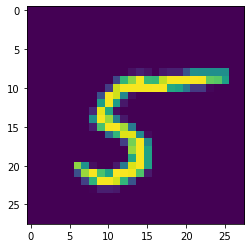

Prediction : 5


In [ ]:
img = x_test[np.random.randint(0,x_test.shape[0])]
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))

### Αξιολόγηση του KNN

In [ ]:
## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)

knn = KNN(x_train,y_train,k=5,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


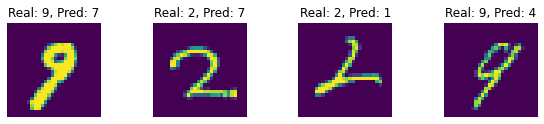

In [ ]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

### Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


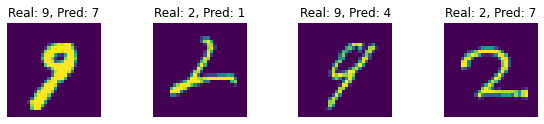

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

### Σύκγριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστήκαμε με τις δύο υλοποιήσεις (τη δική μας και την έτοιμη). Βεβαιωθήκαμε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήσαμε τους χρόνους εκτέλεσης.

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions
CPU times: user 23.6 s, sys: 8.52 ms, total: 23.6 s
Wall time: 23.7 s


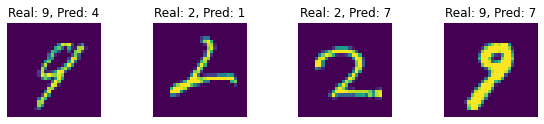

In [ ]:
%%time
knn = KNN(x_train,y_train,k=5,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions
CPU times: user 23.2 s, sys: 17.9 ms, total: 23.2 s
Wall time: 23.3 s


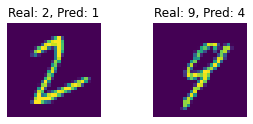

In [ ]:
%%time
knn = KNN(x_train,y_train,k=1,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

precision : 0.9496753246753247
recall : 0.9305086580086581
f1 : 0.9352543155768963
accuracy : 0.93
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions
CPU times: user 23.6 s, sys: 14.8 ms, total: 23.6 s
Wall time: 23.7 s


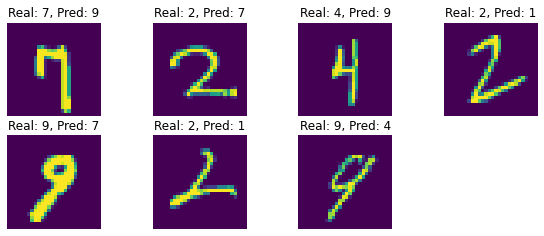

In [ ]:
%%time
knn = KNN(x_train,y_train,k=11,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions
CPU times: user 5.9 s, sys: 6.64 ms, total: 5.91 s
Wall time: 5.93 s


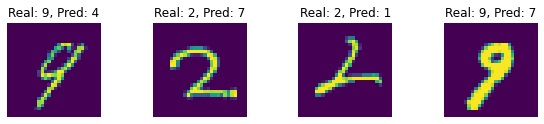

In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(labels,y_pred,x_test[:100])
eval.get_evaluation_report()

precision : 0.9866666666666667
recall : 0.9784090909090908
f1 : 0.9816748768472907
accuracy : 0.98
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  7  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0 10]]
Some images with wrong predictions
CPU times: user 5.7 s, sys: 6.91 ms, total: 5.71 s
Wall time: 5.72 s


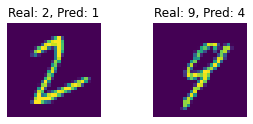

In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(labels,y_pred,x_test[:100])
eval.get_evaluation_report()

precision : 0.9496753246753247
recall : 0.9305086580086581
f1 : 0.9352543155768963
accuracy : 0.93
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  2  5  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions
CPU times: user 5.68 s, sys: 9.28 ms, total: 5.69 s
Wall time: 5.7 s


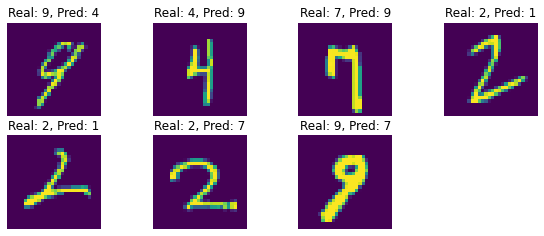

In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=11)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])
eval = Evaluate(labels,y_pred,x_test[:100])
eval.get_evaluation_report()

### Σχολιασμός
Παρατηρούμε ότι η δική μας υλοποίηση του ταξινομητή KNN έχει τα ίδια ακριβώς αποτελέσματα με την έτοιμη βελτιστοποιημένη έκδοση του scikitLearn από άποψη απόδοσης για τις διάφορες τιμές της υπερπαραμέτρου k. Μάλιστα παρατηρούμε ότι τα ψηφία που ταξινομούν λανθασμένα είναι τα ίδια και στις δύο περιπτώσεις.

Η διαφορά της δικής μας υλοποίησης και του έτοιμου ταξινομητή όμως φαίνεται στους χρόνους εκτέλεσης τους, καθώς όπως ήταν αναμενόμενο ο βελτιστοποιημένος ταξινομητής είναι αισθητά πιο γρήγορος (~6sec αντί για ~24sec). Αυτοί οι χρόνοι ωστόσο, φαίνονται ανεξάρτητοι από την τιμή της υπερπαραμέτρου k.

Σημειώνουμε ότι η βέλτιστη απόδοση και για τα δύο μοντέλα παρατηρήθηκε για `k = 1` γείτονες και έχει ακρίβεια 0.98.

## 3ο Μέρος: Naive Bayes



Αρχικά στρογγυλοποιούμε τις τιμές των pixels για να παίρνουν διακριτές τιμές στο $\{0,1\}$

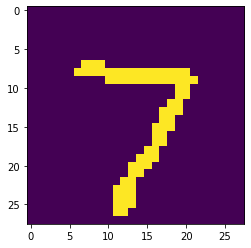

In [18]:
## Στρογγυλοποίηση:
x_train_r = np.round(x_train)
x_test_r = np.round(x_test)

show_image(x_test_r[0])

Παρακάτω μας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Κληθήκαμε αρχικά να υπολογίσουμε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια υπολογίσαμε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [34]:
class NaiveBayes:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    ## pC is a vector with the probability of each class
    self.pC = np.zeros((10,))
    ## pxC is an array with all probabilities p(xi|C)
    self.pxC = np.zeros((x.shape[-1],10)) # = 784 pixels, 10 classes
    ## Compute the probabilities
    self.compute_probabilities()

  def compute_probabilities(self):
    ## Compute p(C) for each class
    for label in self.y:
      self.pC[label] += 1
    self.pC = self.pC / self.y.shape[0]

    ## Compute p(xi|C) for each feature xi and class C
    ###################
    ## Our code below

    for image in range(self.x.shape[0]):
      for pixel in range(self.x.shape[1]):
        self.pxC[pixel][self.y[image]] += self.x[image][pixel]

    self.pxC /= self.x.shape[0]
    
    ## Our code above
    ##################

  def predict(self,x):
    ## ~Probability of x belonging to each class
    ## (not actucal probability since we ignore denominator)
    pcX = np.ones((10,))
    for i in range(10):
      # hint: We have probabilities p({x_j=1}|i) in self.pxC
      # We also need p({x_j=0}|i) for computing p(x|i)
      #################
      ## Our code below

        pcX[i] = self.pC[i]
        for j in range(x.shape[0]):
          if x[j] == 1:
            pcX[i] *= self.pxC[j][i]
          else:
            pcX[i] *= 1 - self.pxC[j][i]
      
      ## Our code above
      ##################
    return np.argmax(pcX)

### Αξιολόγηση του Naive Bayes

precision : 0.7780952380952381
recall : 0.7145454545454546
f1 : 0.6842200263504612
accuracy : 0.74
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  1  0  0  0  0  3  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0]
 [ 1  0  0  1  9  0  0  0  0  3]
 [ 1  0  0  3  0  1  0  0  2  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 12  1  1]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  3  8]]
Some images with wrong predictions


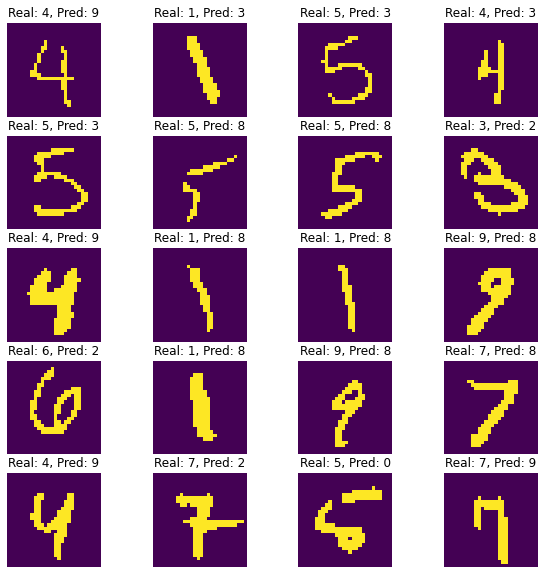

In [33]:
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

### Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το SKLearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή: [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


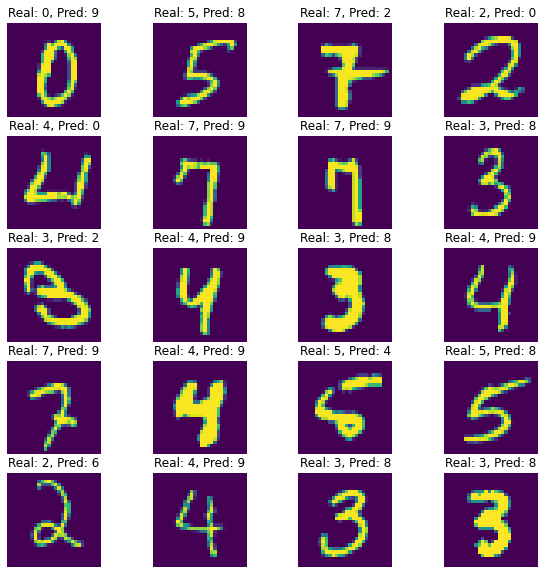

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

### Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Για την έτοιμη υλοποίηση του sklearn δοκιμάστε και το σύνολο x_train_r όπου είναι στρογγυλοποιήμενα τα pixels και το σύνολο x_train οπου παίρνουν συνεχείς τιμές. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

precision : 0.7780952380952381
recall : 0.7145454545454546
f1 : 0.6842200263504612
accuracy : 0.74
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  1  0  0  0  0  3  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0]
 [ 1  0  0  1  9  0  0  0  0  3]
 [ 1  0  0  3  0  1  0  0  2  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 12  1  1]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  3  8]]
Some images with wrong predictions
CPU times: user 1min 11s, sys: 21.8 ms, total: 1min 11s
Wall time: 1min 11s


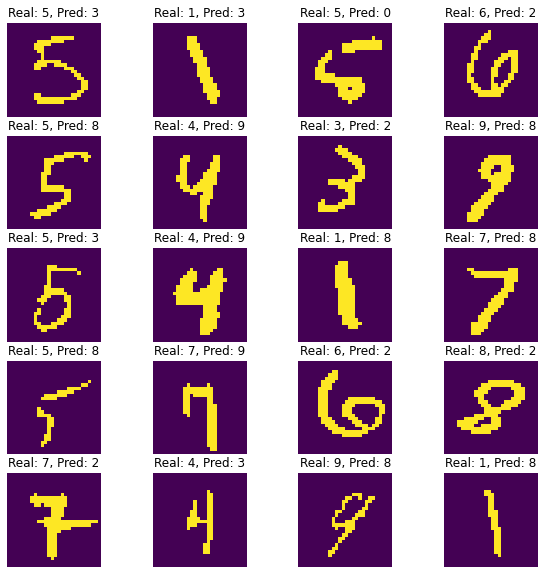

In [35]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions
CPU times: user 607 ms, sys: 10.8 ms, total: 618 ms
Wall time: 619 ms


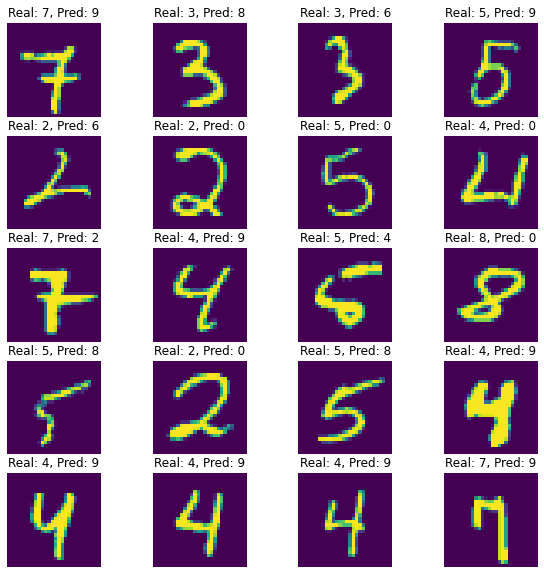

In [36]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])
eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5771820010055304
recall : 0.5655194805194805
f1 : 0.4885160894473657
accuracy : 0.59
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  1  1  2  0  0  1  0  5  1]
 [ 1  1  0  0  3  0  0  1  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  5]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0 10]]
Some images with wrong predictions
CPU times: user 579 ms, sys: 5.01 ms, total: 584 ms
Wall time: 588 ms


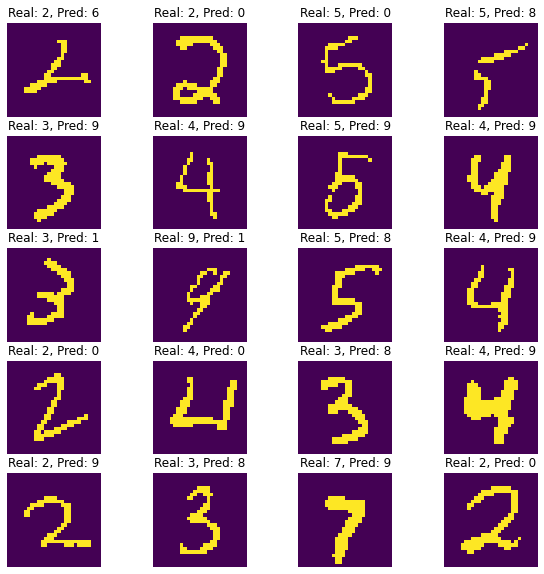

In [37]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train_r, y_train).predict(x_test_r[:100])
eval = Evaluate(y_test[:100], y_pred, x_test_r[:100])
eval.get_evaluation_report()

### Σχολιασμός
Στο κομμάτι αυτό παρατηρούμε πρώτη φορά η δική μας υλοποίηση να εμφανίζει καλύτερη ακρίβεια από ότι η έτοιμη από το Scikit Learn. Συγκεκριμένα, η υλοποίηση μας πετυχαίνει ακρίβεια ίση με 0.74, ενώ η έτοιμη 0.6. Μάλιστα, παρατηρούμε ότι η έτοιμη υλοποίηση με το στρογγυλοποιημένο dataset παρουσιάζει ελαφρώς μικρότερο accuracy.

Το γεγονός ότι η GNB έχει χειρότερη ακρίβεια από τη δική μας υλοποίηση, υποδεικνύει ότι η υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή πιθανότητας.

Ωστόσο, αξίζει να σημειώσουμε την μεγάλη διαφορά στους χρόνους εκτέλεσης, καθώς η δική μας υλοποίηση χρειάζεται 71sec, ενώ η έτοιμη λιγότερο από 1 δευτερόλεπτο (600msec). Επομένως, ανάλογα με την εφαρμογή μπορεί να αξίζει να θυσιάσουμε λίγη ακρίβεια προκειμένου να γλιτώσουμε πολύ χρόνο.

##4ο Μέρος: Multi-Layer Perceptron 

Σε αυτό το σημείο της άσκησης επιλύσαμε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολύεπίπεδο νευρωνικό δίκτυο. Αρχικά υλοποιήσαμε το νευρωνικό χωρίς να χρησιμοποιήσουμε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως sckit-learn, keras), ενώ στην συνέχεια θα κατασκευάσαμε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σας δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά- κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει την ανανέωση των βαρών του δικτύου και συνεπώς στην σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα συνεπώς κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης συνεπώς  επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [43]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [44]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0,input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητοί να διατηρεί 2 τους δυο πίνακες με τα βάρη οι όποιο στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται επιθυμητή λειτουργικότητα. 

In [45]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Weight Initialization
        """
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Our code below

        return np.dot(input,self.weights) + self.biases

        ## Our code above
        ##################
        return output
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματα του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [46]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 10 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου (εδώ 28*28). Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [47]:
class MLP:
    def __init__(self, shapes, input_dim):
        '''
        Κατασκευή του MLP. Τα επίπεδα και το μέγεθός τους ορίζεται από την μεταβλήτη shape, ενώ
        το μέγεθος της εισόδου ορίζεται από την μεταβλήτη input_dim
        '''
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1],shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i],shapes[-1]))

    def forward(self, X):
        """
        Αλγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Our code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            activations.append(l.forward(input))
            input = activations[-1]

            ## Our code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
        
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        return np.mean(loss)

### Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 24
Train accuracy: 0.7342
Val accuracy: 0.7429


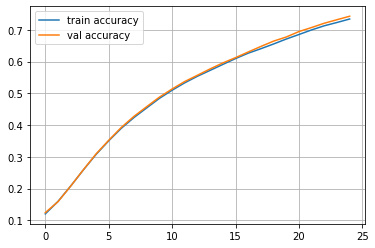

precision : 0.7493411623238562
recall : 0.7382746446570175
f1 : 0.7303855779765424
accuracy : 0.7429
Confusion matrix: 
[[ 886    0    3   11    2   16   51    5    6    0]
 [   0 1089    0    5    0    2    5    0   34    0]
 [  64  128  531   43   24    0  139   31   71    1]
 [  19   50   10  779    4   45   11   18   71    3]
 [  12   10    7    0  764    1   64    6   31   87]
 [  47   32   13  164   37  399   87   28   36   49]
 [  34   12   15    3   12   15  865    0    2    0]
 [  11   53    7    4   22    1    7  879   28   16]
 [  13   51   10   70   20   39   32   25  677   37]
 [  32   26   15   24  209   12   12   76   43  560]]
Some images with wrong predictions


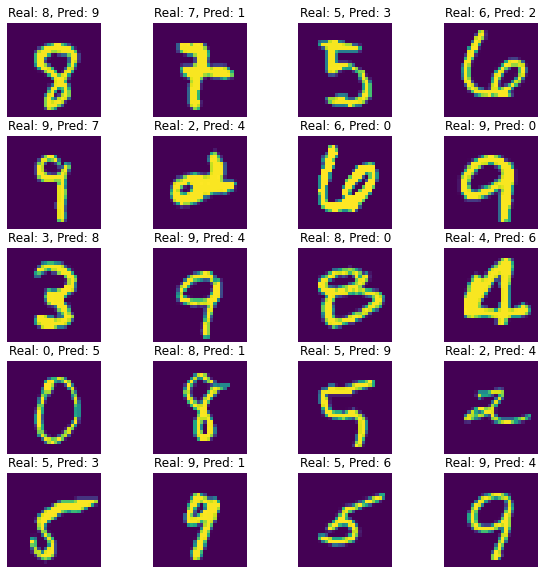

In [48]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
    network.fit(x_train,y_train)
    
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

### Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.9702679070369887
recall : 0.9701582996697613
f1 : 0.970193517627376
accuracy : 0.9705
Confusion matrix: 
[[ 966    0    1    1    0    3    3    1    1    4]
 [   0 1120    1    4    0    0    4    2    4    0]
 [   5    1  999    6    5    1    3    8    2    2]
 [   0    0    5  982    1    8    0    6    8    0]
 [   0    0    4    0  953    0    3    5    3   14]
 [   5    1    0    8    2  855   10    2    7    2]
 [   8    3    0    1    7    4  933    1    1    0]
 [   1    3    8    4    0    0    1 1000    2    9]
 [   5    2    5    7    5    5    7    6  928    4]
 [   2    2    1    8    7    3    2    6    9  969]]
Some images with wrong predictions


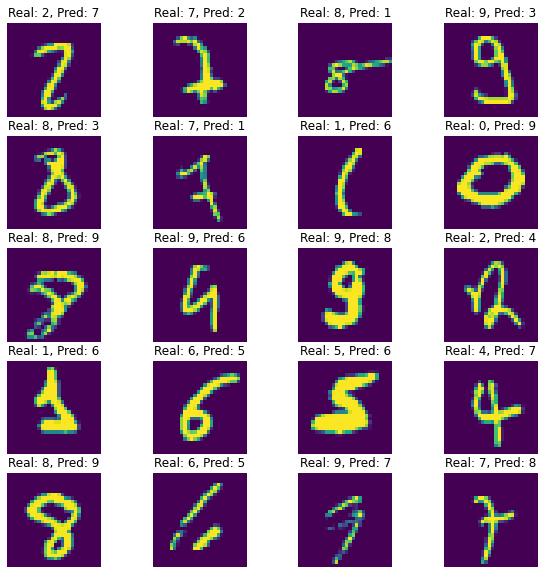

In [49]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

### Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιζόμαστε με τις δύο υλοποιήσεις (τη δική μας και την έτοιμη). Συγκρίνουμε τα αποτελέσματά τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Για να αποκτήσουμε μία πιο πλήρη εικόνα, τρέχουμε την εκπαίδευση των μοντέλων και την πρόβλεψη των 100 πρώτων ψηφίων του test set για 25, 50 και 100 εποχές. Δοκιμάζουμε επίσης τις επιδόσεις των δύο υλοποιήσεων σε ένα πιο σύνθετο δίκτυο με περισσότερα επίπεδα.

Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσμα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 

#### Πειραματισμός με εποχές

precision : 0.7526176390157062
recall : 0.7369104805456006
f1 : 0.7214467039765056
accuracy : 0.7443
Confusion matrix: 
[[ 900    0   10    4    0    1   46    8    1   10]
 [   0 1119    2    3    1    0    2    0    8    0]
 [  24  110  745   22   14    0   79   12   24    2]
 [  14   40   51  802    7   37    7   13   33    6]
 [   2    4    3    2  860    1   57   13   14   26]
 [  61   52   24  253   35  229   53   62   88   35]
 [  22    9   33    2   16    6  853    1   12    4]
 [  10   41   25   30   29    1    3  829   23   37]
 [  13   76   47   69   29    3   34   17  658   28]
 [  20   12    7   21  311    2   22  137   29  448]]
Some images with wrong predictions
CPU times: user 34.1 s, sys: 4.66 s, total: 38.7 s
Wall time: 19.8 s


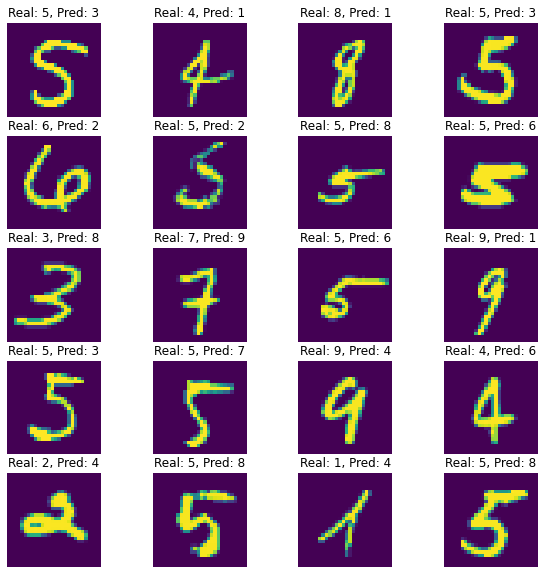

In [55]:
%%time
network = MLP([100, 200, 100, 10], 28*28)
for epoch in range(25):
    network.fit(x_train,y_train)

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

precision : 0.8351868914263216
recall : 0.832748530757312
f1 : 0.8321963975271762
accuracy : 0.836
Confusion matrix: 
[[ 933    0    3    2    2   16   16    2    6    0]
 [   0 1093   14    7    0    0    3    1   17    0]
 [  15   41  840   25   18    2   26   11   51    3]
 [   4    4   37  864    1   43    3   19   22   13]
 [   5    6    7    1  719    4   27    3   18  192]
 [  32   22    9  103   19  598   39   18   25   27]
 [  19    4   14    2    9   13  896    0    0    1]
 [   1   28   21    4   11    1    1  899   16   46]
 [  14   16   32   66   12   33   16   20  736   29]
 [  12   10    3   16  104    9    4   60    9  782]]
Some images with wrong predictions
CPU times: user 1min 7s, sys: 9.16 s, total: 1min 16s
Wall time: 39 s


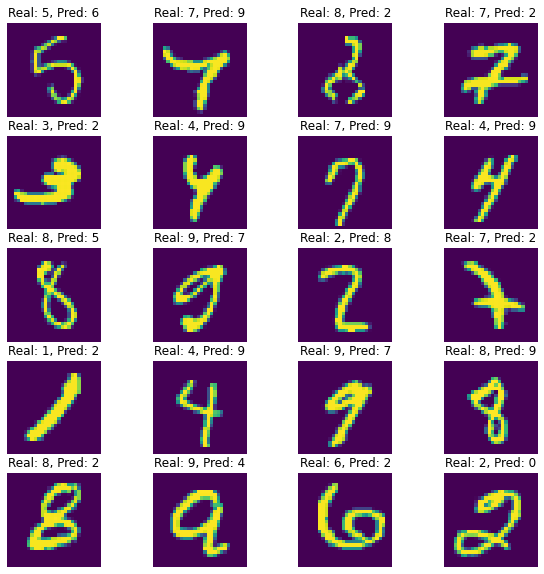

In [56]:
%%time
network = MLP([100, 200, 100, 10], 28*28)
for epoch in range(50):
    network.fit(x_train,y_train)

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

precision : 0.8909090012837504
recall : 0.8908423878671057
f1 : 0.890176196568922
accuracy : 0.8919
Confusion matrix: 
[[ 956    0    4    2    0    8    7    1    2    0]
 [   0 1101    2    5    1    1    5    0   20    0]
 [  11   15  874   13   22    4   24   20   48    1]
 [   5    2   24  849    0   60    4   26   36    4]
 [   1    1    3    1  919    2   16    1    6   32]
 [  15    3    6   37   20  751   17    8   30    5]
 [  20    3   12    2   13   23  884    0    1    0]
 [   6   23   21    2    8    1    0  917   16   34]
 [   7    9    9   14   20   43   13   10  834   15]
 [   9    5    8   11   76   14    3   36   13  834]]
Some images with wrong predictions
CPU times: user 2min 13s, sys: 17.6 s, total: 2min 31s
Wall time: 1min 17s


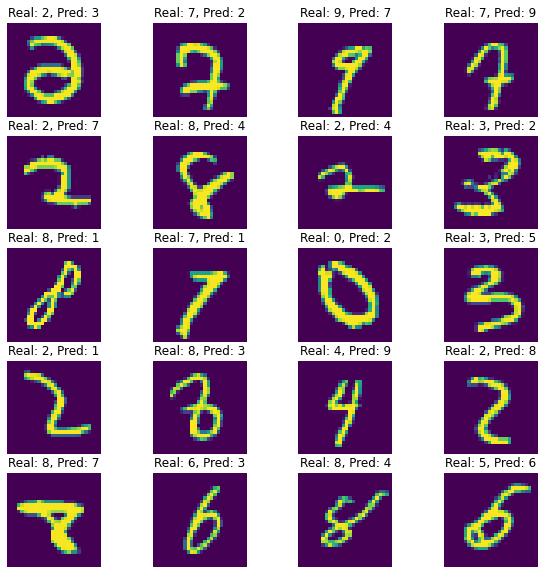

In [57]:
%%time
network = MLP([100, 200, 100, 10], 28*28)
for epoch in range(100):
    network.fit(x_train,y_train)

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.9705613613465502
recall : 0.9704696686073799
f1 : 0.9704970954387132
accuracy : 0.9708
Confusion matrix: 
[[ 966    0    1    2    1    2    2    1    3    2]
 [   0 1121    3    1    0    1    5    2    2    0]
 [   2    2 1008    5    4    0    4    4    3    0]
 [   1    1    8  974    1    7    0    6   11    1]
 [   3    2    1    0  954    1    4    3    2   12]
 [   3    0    0    8    2  859   13    1    4    2]
 [   7    4    1    1    6    5  933    1    0    0]
 [   1    4    8    3    0    0    1  998    2   11]
 [   4    1    5   12    4    9    4    6  924    5]
 [   5    3    2   10    7    3    1    3    4  971]]
Some images with wrong predictions
CPU times: user 43.7 s, sys: 16.2 s, total: 59.9 s
Wall time: 30.8 s


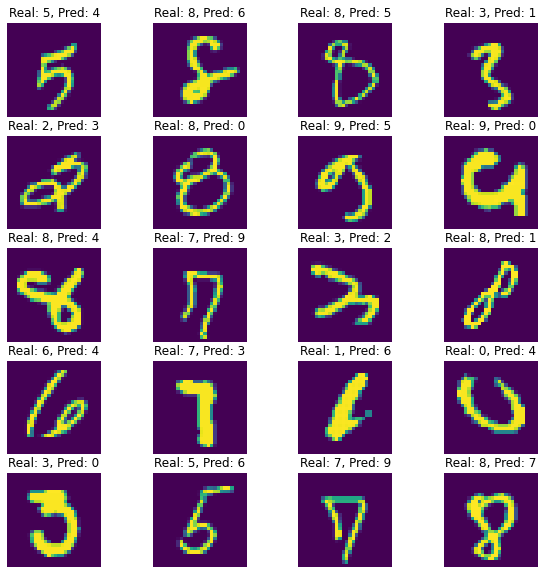

In [52]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = 25)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

precision : 0.9703137309240091
recall : 0.9701298129534013
f1 : 0.9701993468547391
accuracy : 0.9706
Confusion matrix: 
[[ 964    0    3    1    1    3    3    1    2    2]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   2    0 1008    3    4    0    3    6    5    1]
 [   0    0    8  977    1    6    0    7    9    2]
 [   2    0    2    0  952    2    7    3    2   12]
 [   3    0    1   13    3  853    9    2    6    2]
 [   6    3    0    2    6    4  937    0    0    0]
 [   1    3   11    2    1    0    0  998    2   10]
 [   6    1    5   10    6    7    6    7  922    4]
 [   3    3    1    7    9    3    2    6    7  968]]
Some images with wrong predictions
CPU times: user 1min, sys: 22.4 s, total: 1min 22s
Wall time: 42.4 s


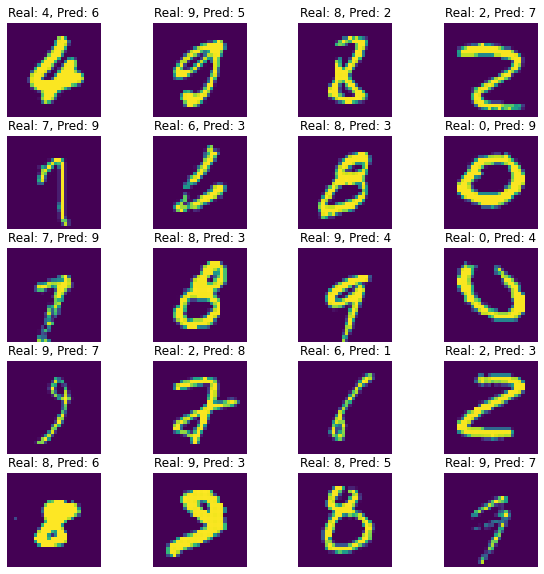

In [53]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = 50)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

precision : 0.9693343353004611
recall : 0.9692679073689684
f1 : 0.9692907401252426
accuracy : 0.9696
Confusion matrix: 
[[ 964    0    1    2    1    5    2    0    2    3]
 [   0 1120    3    2    0    0    5    2    3    0]
 [   4    1 1006    6    3    0    2    3    7    0]
 [   0    0    5  975    1    9    0    8   11    1]
 [   1    0    2    1  950    0    7    5    1   15]
 [   6    0    1    8    4  855    8    0    8    2]
 [   8    3    2    1    4    4  935    0    1    0]
 [   0    5    8    2    0    0    1  995    3   14]
 [   7    1    4    6    4    4    5    8  931    4]
 [   2    3    2    9   13    3    0    5    7  965]]
Some images with wrong predictions
CPU times: user 59 s, sys: 21.9 s, total: 1min 20s
Wall time: 41.4 s


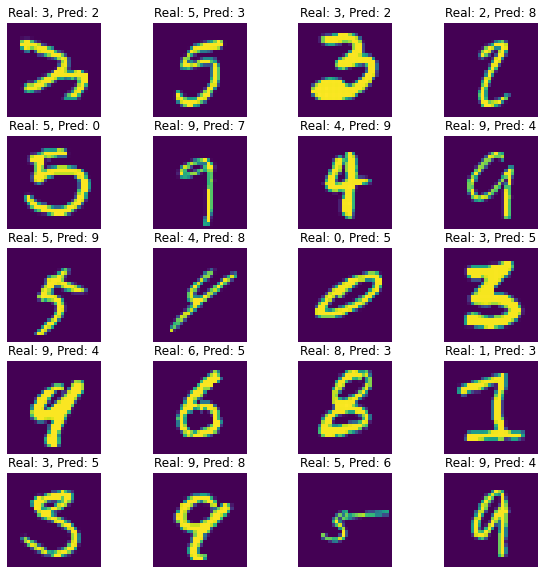

In [54]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = 100)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

#### Πειραματισμός με διαφορετικό δίκτυο

precision : 0.8709233399443953
recall : 0.8705861178380614
f1 : 0.8701423478662127
accuracy : 0.8723
Confusion matrix: 
[[ 949    0    2    1    0   14   10    1    3    0]
 [   0 1100    4    2    1    0    3    3   22    0]
 [  17   25  828   24   22    3   32   23   54    4]
 [  11    0   24  833    1   53    4   27   51    6]
 [   2    0    3    0  857    0   19    0    7   94]
 [  26    4   15   36   13  708   30    7   41   12]
 [  20    3   19    1   10   27  872    0    6    0]
 [   7   20   17    0    7    0    1  916   13   47]
 [   6   10   10   25    9   58   17   11  796   32]
 [   6    2    5    8   43   17    0   44   20  864]]
Some images with wrong predictions
CPU times: user 4min 11s, sys: 33.6 s, total: 4min 45s
Wall time: 2min 25s


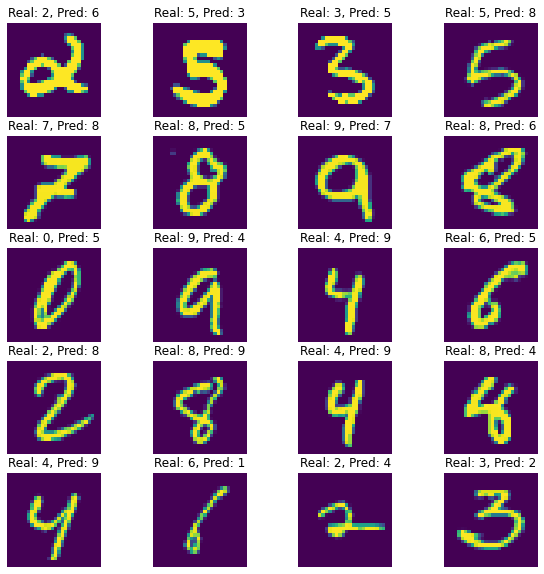

In [58]:
%%time
network = MLP([100, 200, 300, 200, 100, 10], 28*28)
for epoch in range(100):
    network.fit(x_train,y_train)

y_pred = network.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

precision : 0.9727977831530744
recall : 0.9727686384145121
f1 : 0.9727708737704847
accuracy : 0.973
Confusion matrix: 
[[ 967    0    2    0    0    2    2    1    4    2]
 [   0 1123    4    2    0    0    2    1    3    0]
 [   4    1 1005    7    1    1    3    5    5    0]
 [   2    0    6  973    0   11    0    7   10    1]
 [   2    0    1    1  949    1    4    3    2   19]
 [   5    0    1    5    2  867    7    2    2    1]
 [   6    3    2    1    5    4  935    0    2    0]
 [   0    5   14    0    0    0    0 1003    2    4]
 [   3    1    6    6    4    6    4    3  935    6]
 [   3    2    1    8    7    0    2    3   10  973]]
Some images with wrong predictions
CPU times: user 2min 22s, sys: 49.7 s, total: 3min 12s
Wall time: 1min 38s


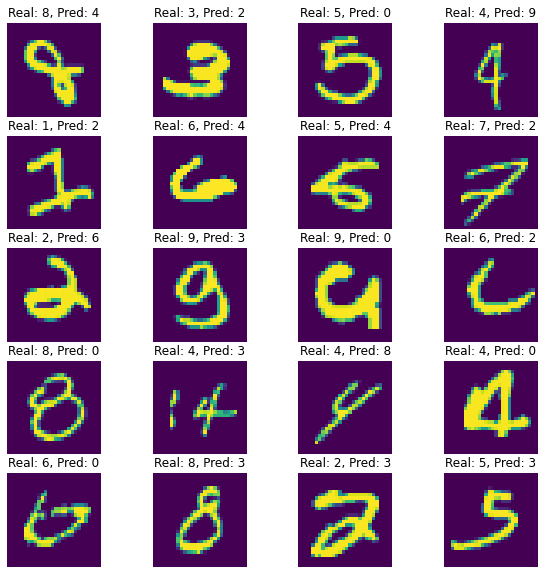

In [59]:
%%time
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 200, 100), max_iter = 100)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

###Σχολιασμός

Αρχικά να αναφέρουμε ότι οι γρήγορες ταχύτητες και των δύο υλοποιήσεων μας επέτρεψαν να αξιολογήσουμε τα αποτελέσματα τους σε ολόκληρο το test dataset, αντί για τις 100 πρώτες εικόνες.

Όσον αφορά τα αποτελέσματα των δύο μοντέλων, παρατηρούμε ότι το δικό μας βελτιώνεται αρκετά με την προσθήκη επιπλέον εποχών (από 0.74 σε 0.89 accuracy). Από ένα σημείο και μετά, η βελτίωση αυτή φαίνεται να φθίνει, καθώς για 50 εποχές πετυχαίνουμε 0.84 accuracy, ενώ για 100 εποχές 0.89. Το έτοιμο μοντέλο, παρατηρούμε ότι από τις 25 εποχές πετυχαίνει πολύ ακριβές accuracy (0.97), ενώ μένει σταθερό για περισσότερες εποχές.

Σχετικά με τους χρόνους εκπαίδευσης και προβλέψεων των δύο υλοποιήσεων, παρατηρούμε ότι ο χρόνος της δικής μας υλοποίησης αυξάνεται γραμμικά με το πλήθος των εποχών εκπαίδευσης. Ανετιθετως, ο χρόνος του έτοιμου μοντέλου εμφανίζει πολύ μικρότερο ρυθμό αύξησης καθώς αυξάνονται οι εποχές εκπαίδευσης.

Οι διαφορές αυτές, όπως αναφέρθηκε και παραπάνω οφείλονται στο γεγονός οτι για την έτοιμη κλάση έχουν γίνει πολλές βελτιστοποιήσεις στη λειτουργία και τον τρόπο εκπαίδευσης.

Τέλος, όσον αφορά τον πειραματισμό με το πιο σύνθετο δίκτυο νευρώνων, παρατηρούμε ότι στην περίπτωση του MNIST αυτό επιδρά αρνητικά στην επίδοση των μοντέλων.

# Αξιολόγηση- Συμπεράσματα 

  
Στο σημείο αυτό, αξιολογούμε συνολικά τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους καθώς και παρατηρήσεις που δημιουργήθηκαν από αυτά. Αναλυτικά συμπεράσματα για την κάθε τεχνική βρίσκονται στο εκάστοτε μέρος, επομένως το κομμάτι αυτό εξυπηρετεί περισσότερο τον σκοπό της σύνοψης τους.

### K Nearest Neighbors (KNN)
Για τον ταξινομητή KNN καταφέραμε με την υλοποίηση μας να πετύχουμε ίδιες επιδόσεις με τον έτοιμο ταξινομητή από άποψη αποτελεσμάτων. Ωστόσο, ο έτοιμος ταξινομητής κρίνεται καλύτερος εξαιτίας του ότι τρέχει σε πολύ λιγότερο χρόνο (6sec αντί για 24sec). Επίσης, αξίζει να σημειωθεί ότι η βέλτιστη τιμή της υπερπαραμέτρου k για το MNIST βρέθηκε να είναι 1.

--- 
</br>

### Naive Bayes
Στον ταξινομητή Naive Bayes πετύχαμε το πολύ ενδιαφέρον αποτέλεσμα του να προβλέπει με μεγαλύτερη ακρίβεια τα ψηφία ο ταξινομητής που υλοποιήσαμε εμείς, από ο,τι ο έτοιμος του Scikit Learn. Αυτό οφείλεται στο γεγονός ότι ο έτοιμος ταξινομητής υποθέτει ότι το κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή πιθανότητας, ενώ στο MNIST κάτι τέτοιο δεν ισχύει. Ωστόσο, η δική μας υλοποιήση χρειάζεται παραπάνω από 1 λεπτό για να προβλέψει τις πρώτες 100 τιμές του test dataset, ενώ η έτοιμη υλοποίηση λιγότερο από 1sec. Επομένως η επιλογή της υλοποίησης έγκειται από τις ανάγκες της κάθε εφαρμογής (ακρίβεια ή χρόνος).

---
</br>

### Multi-Layered Perceptron (MLP)

Ο ταξινομητής MLP ήταν ο μοναδικός με ταχύτητες εκπαίδευσης και προβλέψεων τέτοιες που μας επέτρεψε να αξιολογήσουμε τις δύο υλοποιήσεις σε ολόκληρο το train dataset. Αυτό που παρατηρήσαμε είναι ότι η δική μας υλοποίηση εμφάνιζε μικρότερη ακρίβεια από την έτοιμη βελτιστοποιημένη, ωστόσο έδειχνε να βελτιώνεται καθώς αυξάνονταν οι εποχές εκπαίδευσης. Η αύξηση αυτή ωστόσο είναι αρκετά μικρή ώστε να φτάσει τα επίπεδα ακρίβειας της βελτιστοποιημένης υλοποίησης. Μία ακόμη παρατήρηση είναι ότι στη δική μας υλοποίηση ο χρόνος εκτέλεσης αυξανόταν γραμμικά με την προσθήκη επιπλέον εποχών εκπαίδευσης, ενώ στην έτοιμη υλοποίηση αυξανόταν με πολύ πιο αργό ρυθμό. Τέλος, έπειτα από πειραματισμό με πιο σύνθετα δίκτυα νευρώνων παρατηρήθηκε ότι η ακρίβεια των μοντέλων δεν βελτιωνόταν.